<a href="https://colab.research.google.com/github/gibsonea/Biostats/blob/main/LabSolutions/Solutions05_BayesRule_ScreeningTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a name="05intro">2.2: Bayes' Rule and Screening Tests</a>

----

Medical screening is an essential part of disease prevention.  Primary care screening tests are less invasive, for example mammograms or blood tests, but do not have the best accuracy, for example, there may be false positives (i.e. someone received a positive test when they don't have the disease).  If a patient tests positive in primary care, they will typically undergo a secondary care test which is more invasive, but also more accurate, for example biopsy.  Understanding the statistics behind screening tests and how these tests are used in medical decisions is important for any biomedical engineer.  

The two main properties of a diagnostic test are <font color="mediumseagreen">**sensitivity**</font> and <font color="mediumseagreen">**specificity**</font>.

- <font color="mediumseagreen">**Sensitivity**</font> is the probability that a patient will have a positive test result if they have the disease.  We can describe this as a conditional probability: $P(T+|D+)$.  
- <font color="mediumseagreen">**Specificity**</font> is the probability that a patient will have a negative result if they do not have the disease.  It is described by: $P(T-|D-)$.

<br>

These test properties can be measured by a clinical study using a sample of patients who are known to have the disease and a sample of healthy controls.  




### <a name="05ex-roll">Example: Calculating sensitivity and specificity of a new diagnostic test</a>

----

A noninvasive test for pulmonary hypertension would enable clinicians to perform fewer catheterizations, which in turn would save time and money and greatly reduce patient stress. Researchers at CU Anschutz developed one such noninvasive test based on echocardiographic imaging measurements (EI).

- A small clinical trial was conducted to determine how well this new noninvasive test worked.
- The study involved 41 patients with pulmonary hypertension and 12 healthy controls.
- Out of 41 patients who have the disease, 30 tested positive (True Positives) while 11 tested negative (False Negatives).  And out of 12 healthy controls, 6 tested positive (False Positives) and 6 tested negative (True Negatives).  The results of the trial are summarized in the table below.  

<br>

<figure>
<img
src="https://raw.githubusercontent.com/gibsonea/Biostats/main/Images/SensSpecImage.png" width="400">

</figure>

<br>



## <a name="05q1">Question 1</a>

----

Calculate the sensitivity of the diagnostic test $P(T+|D+)$.  Remember the property of conditional probability: $\displaystyle P(B | A) = \frac{P(A \cap B)}{P(A)}$

### <a name="05ans1">Solution to Question 1</a>

----

<br>  
Sensitivity = 30/(30+11) = 30/41 = 0.73
<br>



In [ ]:
sens = 30/(30+11)
sens

[1] 0.7317073

## <a name="05q2">Question 2</a>

----

Calculate the specificity of the diagnostic test $P(T-|D-)$.



### <a name="O5ans2">Solution to Question 2</a>

----

<br>  
Specificity = 6/(6+6) = 0.5
<br>

In [ ]:
spec = 6/(6+6)
spec

[1] 0.5

# <a name="O5notation">Predictive Values</a>

----

If a patient receives a positive test result from a screening test, they would like to know the probability that they do have the disease.  This probability is called the Positive Predictive Value (PPV): $P(D+|T+)$.  This is **not** the same as the sensitivity of the test: $P(T+|D+)$.

<br>

Likewise, if they test negative, they would like to know what is the probability that they do not have the disease.  This is the negative predictive value (NPV): $P(D-|T-)$.

<br>

In order to find these predictive values, we need not only the sensitivity and specificity of the test, but the disease prevalence, $P(D+)$.  The equations relating these comes from Bayes' Rule and are as follows:

<br>

$$PPV = \frac{\text{Sensitivity} \cdot P(D+)}{\text{Sensitivity} \cdot P(D+) + (1 - \text{Specificity}) \cdot (1 - P(D+))}$$

<br>

$$NPV = \frac{\text{Specificity} \cdot (1-P(D+))}{\text{Specificity} \cdot (1-P(D+)) + (1-\text{Sensitivity}) \cdot P(D+) }$$



## <a name="O5q3">Question 3</a>

----


A rapid flu test based on a saliva sample has a sensitivity of 89% and a specificity of 95%. The prevalence of flu in the county in which you live is 5%.
- If you have a positive test result, what is the probability you have flu?



<br>



### <a name="O5ans3">Solution to Question 3</a>

----

<br>  
The probability of having the flu is 48.4%
<br>

In [ ]:
sens = 0.89
spec = 0.95
PPV = sens*(0.05)/(sens*(0.05)+(1-spec)*(1-0.05))
PPV

[1] 0.4836957

## <a name="O5q4">Question 4</a>

----


Let's say instead that you live in a county with a higher prevalence of flu of 15%.
- If you have a positive test result, what is the probability you have flu?



<br>



### <a name="O5ans4">Solution to Question 4</a>

----

<br>  
The probability of having the flu is 75.9%
<br>

In [ ]:
sens = 0.89
spec = 0.95
PPV = sens*(0.15)/(sens*(0.15)+(1-spec)*(1-0.15))
PPV

[1] 0.7585227

# <a name="O5notation">Aside on Bayesian Inference</a>

----

The probability of an event is the relative frequency of the event occuring over an indefinitely large number of trials.  

For example, if you toss a fair coin and calculate the # of heads/total # of tosses, it will approach 1/2 for many tosses (trials).

This definition above forms the basis for the frequentist method of inference, which is the main approach to statistical inference used in statistical practice. However, Bayesian inference is an alternative method of inference. The Bayesian school of inference rejects the idea of the frequency definition of probability, considering that it is a theoretical concept that can never be realized in practice. Instead, Bayesians conceive of two types of probability: a prior probability and a posterior probability.

The **prior probability** of an event is the best guess by the observer of an event's likelihood in the absence of data.

The **posterior probability** of an event is the likelihood that an event will occur after collecting some empirical data. It is obtained by integrating information from the prior probability with additional data related to the event in question.

From the previous flu example, the probability that a random person from the county you live has the flu is given by the prevelence of flu or P(D+) = 0.15 and is the **prior probability**.  If the person then is tested and receives a positive test result, their probability of having the flu increases.  This is called the **posterior probability**.

# <a name="O5notation">Receiver Operator Characteristics (ROC) Curve</a>

----

Consider the previous example concerning a non-invasive diagnostic test for pulmonary hypertension (PH).  The test uses Echocardiographic Imaging (EI) to measure the pulmonary artery diameter $X_{d}$ which ranges from 0.5 to 4.  A larger artery diameter means the person is at risk of having PH. For clinical testing purposes, one needs to choose a diagnostic cutoff value for $X_{d}$ to decide if the test result is positive or negative.  Instead of arbitrarily choosing such a "cutoff" value, one can create a Receiver Operator Characteristics (ROC) curve to get a better idea of the accuracy of the test.

To create a ROC curve, one varies the cutoff value and calculates the test sensitivity and specificity.  Let's do an example with the non-invasive test for PH.

 We construct the ROC curve by first allowing our cutoff value to be $X_{d}$ = 4.  In this case, the cutoff is set so high that no one in the study tests positive and everyone tests negative.

 <br>

<figure>
<img
src="https://raw.githubusercontent.com/gibsonea/Biostats/main/Images/ROCcurveXd4.png" width="400">

</figure>

<br>

Sensitivity is the number of true positives (i.e. both disease positive and test positive) divided by number of disease positives:

- Sensitivity = 0/(0+41) = 0

Specificity is the number of true negatives (i.e. both disease negative and test negative) divided by the number of disease negatives:

- Specificity = 12/(0+12) = 1

<br>

For cutoff of 4,
- Sensitivity = 0
- 1 - Specificity = 1 - 1 = 0

Our point on the ROC curve would be **(0,0)**.

<br>


Next, we can choose a cutoff value that is at the lowest value of $X_{d}$ so that everyone is test positive (i.e. cutoff of $X_{d}$ = 0)

Our contingency table would then be:

 <br>

<figure>
<img
src="https://raw.githubusercontent.com/gibsonea/Biostats/main/Images/ROCcurveXd0.png" width="400">

</figure>

<br>

- Sensitivity = 41/(41+0) = 1
- Specificity = 0/(12+0) = 0

<br>

For cutoff of 0,
- Sensitivity = 1
- 1 - Specificity = 1 - 0 = 1

Our point on the ROC curve would be **(1,1)**.

<br>

Note that all ROC curves include the points **(0,0)** and **(1,1)**.

<br>

One then varies the cutoff value incrementally and computes the sensitivity and sensitivity with each change building up the ROC curve.

For cutoff $X_d$ = 2.5, 1:

 <br>

<figure>
<img
src="https://raw.githubusercontent.com/gibsonea/Biostats/main/Images/ROCcurveXd1and2p5.png" width="400">

</figure>

<br>



## <a name="O5q5">Question 5</a>

----


What are the points on the ROC curve for cutoffs of $X_d$ = 1 and 2.5.


<br>

### <a name="O5ans5">Solution to Question 5</a>

----

<br>  
The points on the ROC curve are:
(0.25,0.585) for $X_d$ = 2.5 and

(0.667,0.927) for $X_d$ = 1
<br>

In [ ]:
# for Xd = 2.5
sens = 24/(24+17)
sens
spec = 9/(3+9)
spec
1-spec

[1] 0.5853659

[1] 0.75

[1] 0.25

In [ ]:
# for Xd = 1
sens = 38/(38+3)
sens
spec = 4/(8+4)
spec
1-spec

[1] 0.9268293

[1] 0.3333333

[1] 0.6666667

## <a name="O5q6">Question 6</a>

----


Create a plot of the ROC curve from the points you calculated.


<br>

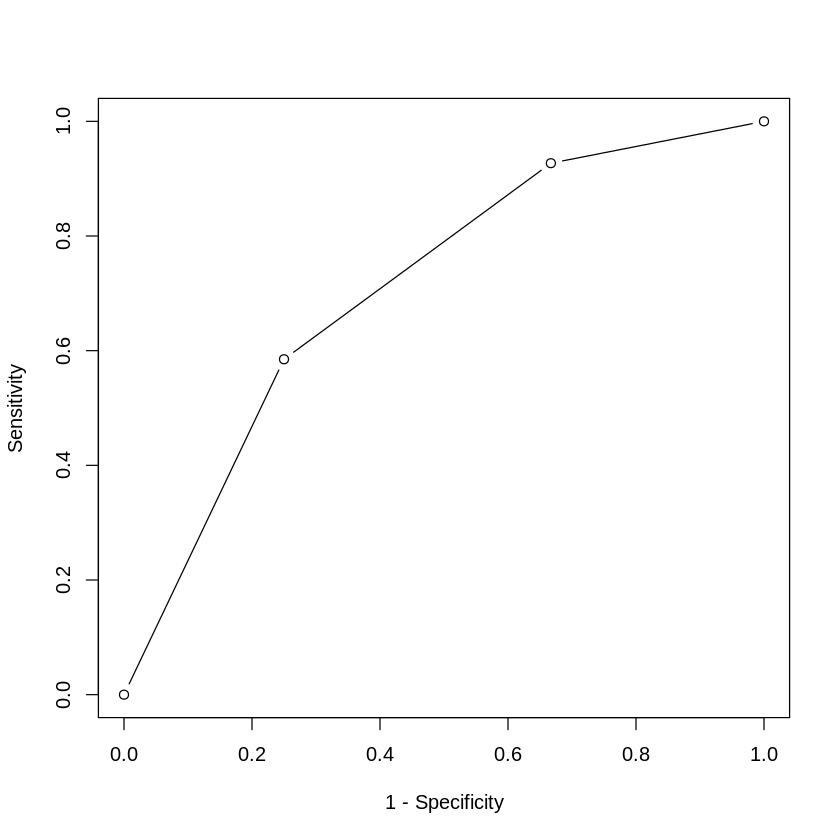

In [ ]:
#code cell for creating ROC curve.  Use plot().  Can use ?plot to find different plot options

ROC.y <-c(0,0.585,0.927,1) #Format for creating vector - sensitivity
ROC.x <- c(0,0.25,0.667,1) # 1 - specificity

plot(ROC.x,ROC.y,type = "b",xlab = "1 - Specificity", ylab = "Sensitivity")


# <a name="O4notation">Area under the Curve</a>

---

Suppose you did many tests and plotted the frequency distribution of all $X_d$ values taken from people who have PH and those who do not.  The plot below shows two different distributions below for those who do have the disease and who do not.

 <br>

<figure>
<img
src="https://raw.githubusercontent.com/gibsonea/Biostats/main/Images/ROCexplanation.png" width="600">

</figure>

<br>


Figure A and B show the same distributions but with different threshold values.  Changing the threshold changes the # of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) as can be seen in the plot.  The ROC curve can better describe these two distributions.

The area under the ROC curve (AUC) is a useful property that can tell you more about whether your test is accurate.  If the test is perfect, the area under the curve would be 1, or an accuracy of 100% - i.e. always correctly identifies whether the person has the disease or not.  If you have a test that has some false positives and false negatives, then the AUC is less than 1.  The plot below describes how different distributions change the ROC curve.

 <br>

<figure>
<img
src="https://raw.githubusercontent.com/gibsonea/Biostats/main/Images/ROCarea.png" width="600">

</figure>

<br>

## <a name="O5q7">Question 7</a>

----


Use the points on the ROC curve from Question 6 to calculate the area under the curve (AUC) using the trapezoidal rule.


<br>

In [ ]:
#First you will need to install the library which contains trapz() function

install.packages("pracma")
library(pracma)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Use this code cell to calculate the AUC

AUC = trapz(ROC.x,ROC.y)
AUC

[1] 0.7092225

Note that in this example, we have only calculated points on the ROC for just a few values of the threshold.  Typically you would want to include every data point in your sample in the calculation of a ROC curve.

## <a name="O5q8">Question 8</a>

----


What is the accuracy of the test?  Do you think this would be a good clinical test and why?



<br>


### <a name="O5ans8">Solution to Question 8</a>

----

<br>  
The accuracy of the test is 70.9% which mean that the test can distinguish whether a person has the disease or not 70.9% of the time.  A value of AUC between 70 and 80% is considered "good".  
<br>

# <a name="CC License">Creative Commons License Information</a>
---


![Creative Commons
License](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)

Developed by Emily Gibson

For similar interactive OER materials in other courses funded by this project in the Department of Mathematical and Statistical Sciences at the University of Colorado Denver, visit <https://github.com/CU-Denver-MathStats-OER>.